In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
K_classifier = KNeighborsClassifier()
K_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
test_1 = y[150]
test_1

4

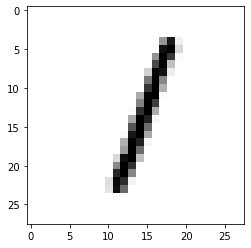

In [11]:
digit = np.array(X.iloc[29651]).reshape(28,28)
plt.imshow(digit, cmap='binary')
plt.show()

In [12]:
K_classifier.predict([X.iloc[29651]])

array([1], dtype=uint8)

In [13]:
from sklearn.model_selection import cross_val_predict

In [14]:
y_train_predict = cross_val_predict(K_classifier, X_train, y_train,cv=2)

In [15]:
results = [(y_train == i) for i in range(10)]

In [16]:
from sklearn.metrics import confusion_matrix

In [26]:
conf_matrix = confusion_matrix(y_train, y_train_predict)
conf_matrix

array([[5882,    4,    5,    2,    0,    5,   20,    1,    1,    3],
       [   2, 6703,   11,    2,    1,    0,    2,   14,    2,    5],
       [  59,   83, 5649,   23,    6,    6,    9,   95,   18,   10],
       [  14,   22,   38, 5883,    0,   59,    4,   37,   46,   28],
       [   5,   63,    2,    1, 5590,    0,   15,   11,    1,  154],
       [  19,   23,    7,   87,   12, 5164,   68,    5,    8,   28],
       [  19,   14,    1,    0,    5,   30, 5848,    0,    1,    0],
       [   5,   74,   15,    2,   25,    1,    0, 6072,    0,   71],
       [  29,   97,   21,   96,   35,  115,   27,   19, 5345,   67],
       [  19,   14,    8,   52,   53,   14,    4,   91,   11, 5683]],
      dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score

In [19]:
def print_info(mode, ans):
    text = ['Precision score', 'Recall score']
    print(f'{text[0] if mode == 0 else text[1]} is {ans} -> {ans*100:.4f}%\n')

print_info(0,precision_score(y_train, y_train_predict, average='weighted'))

Precision score is 0.9640020942215399 -> 96.4002%



In [20]:
print_info(1, recall_score(y_train, y_train_predict, average='macro'))

Recall score is 0.9630607119907285 -> 96.3061%



In [22]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_train, y_train_predict,average='macro')

0.963432976834072

<AxesSubplot:>

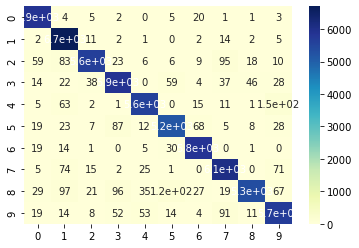

In [31]:
sns.heatmap(conf_matrix,cmap='YlGnBu',annot=True)

In [32]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_train, y_train_predict)

0.96365